In [1]:
import json
import numpy as np

In [2]:
# 读取 json 文件
file_name = '../../data/npy_data/pcaps_size_record.json'
with open(file_name, "r") as json_read:
    load_json = json.load(json_read)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['science','ieee','no-latex'])

## 获得所有的 pcap 的大小

In [4]:
pcaps_size_list = []
for i, j in load_json.items():
    print(i, len(j))
    pcaps_size_list = pcaps_size_list + j
print(len(pcaps_size_list))

Chat 1237
Email 631
FT 12281
P2P 389
Streaming 1651
VoIP 37105
VPN_Chat 258
VPN_Email 143
VPN_FT 438
VPN_P2P 256
VPN_Streaming 542
VPN_VoIP 699
55630


## 绘制图像

- 绘制柱状图
- 绘制比例图

Text(0, 0.5, 'Pcap Number')

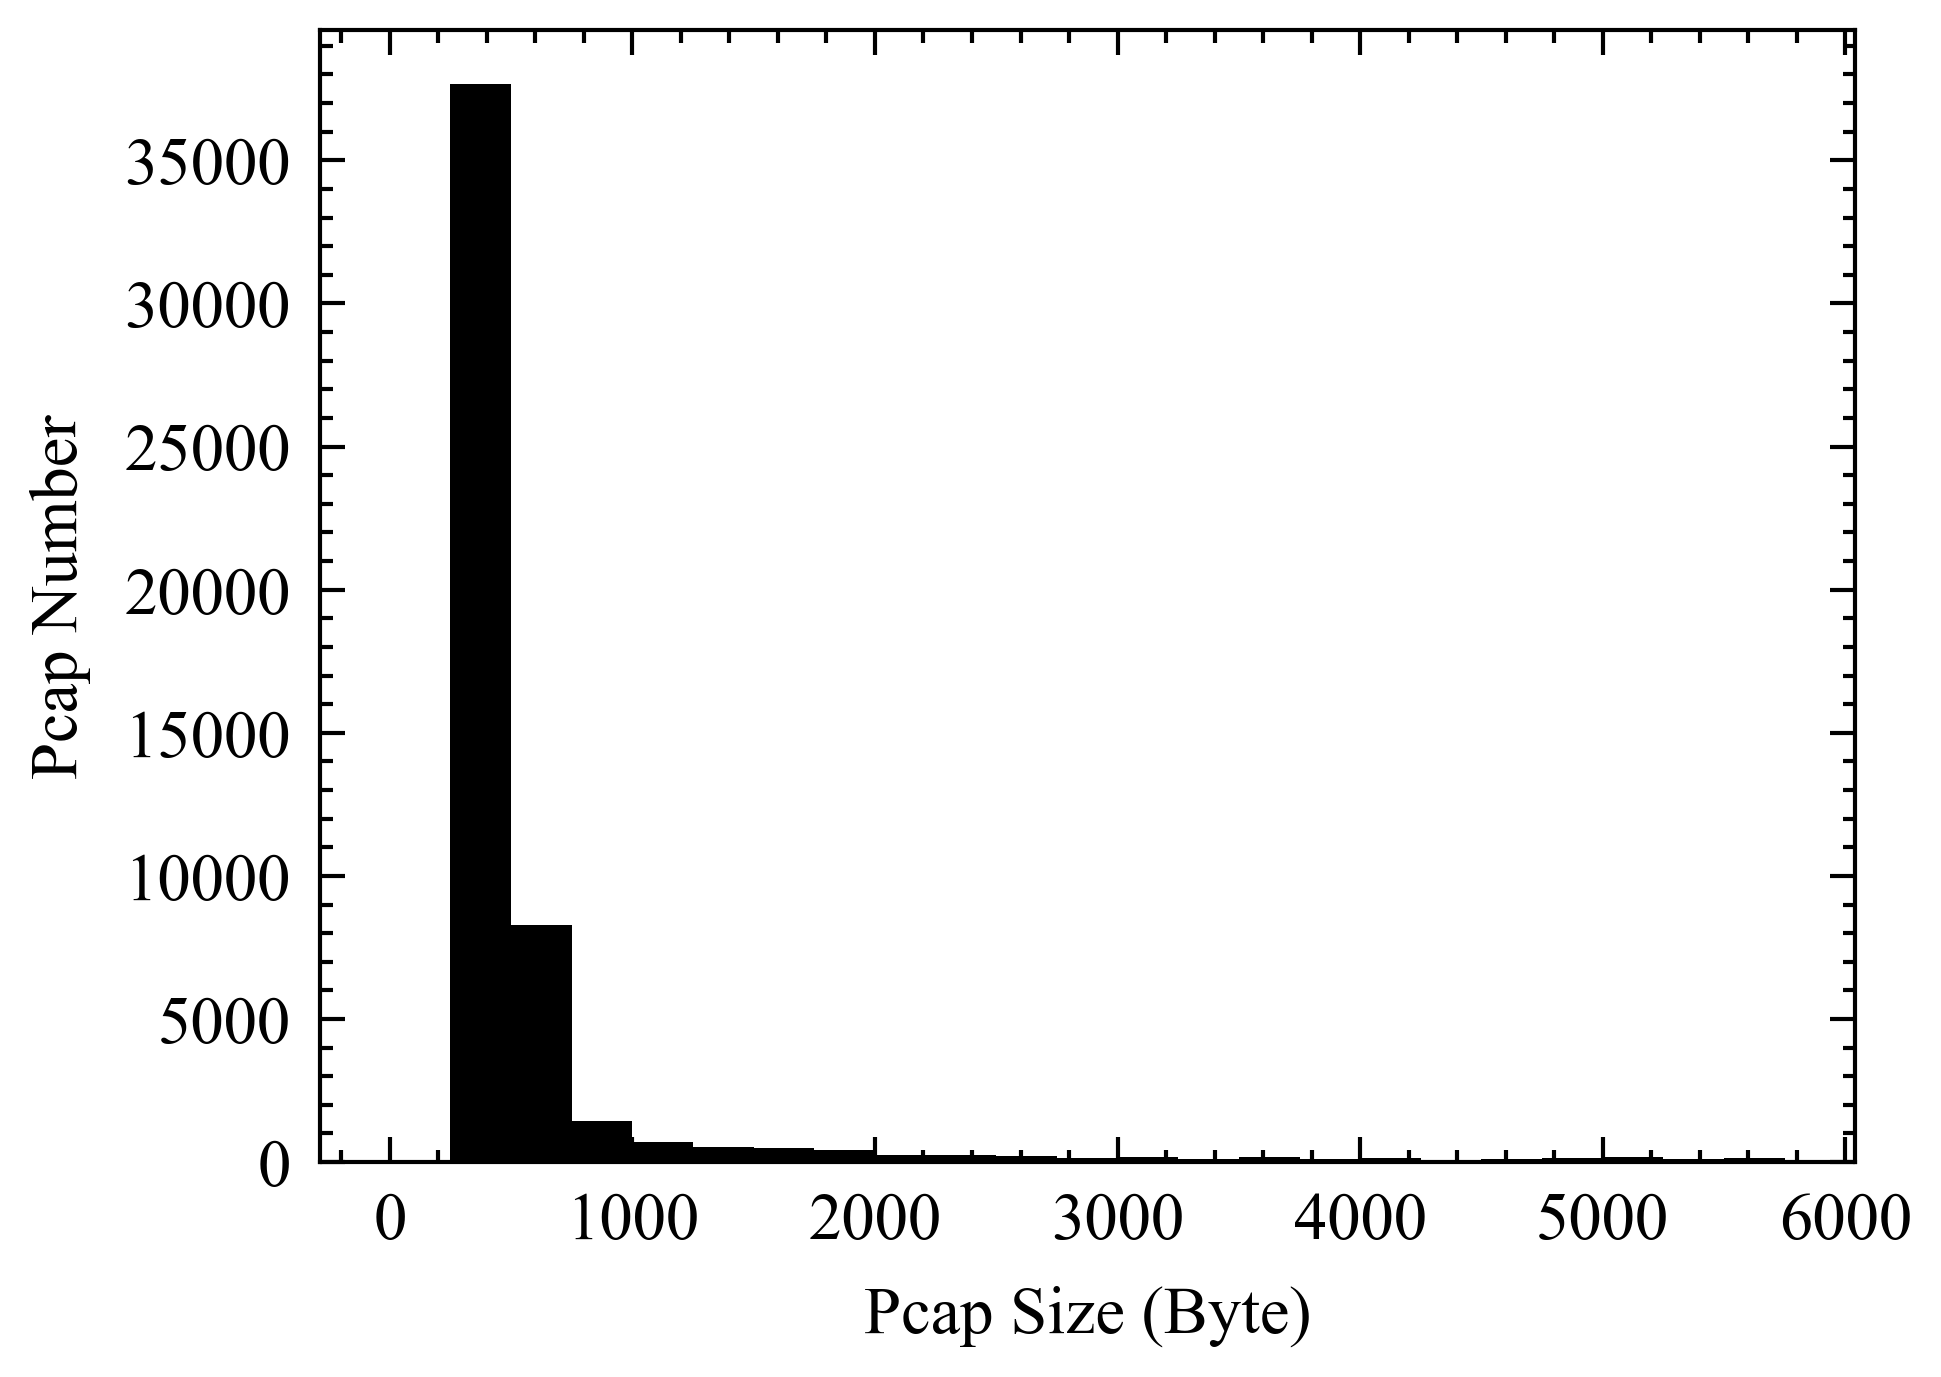

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

bins = np.arange(0,6000,250) # 产生区间刻度

ax.hist(pcaps_size_list, bins=bins)

plt.xlabel('Pcap Size (Byte)') # 设置 x 轴的 label
plt.ylabel('Pcap Number') # 设置 y 轴的 label

In [5]:
# 统计不同区间的样本个数
binRange = [0, 784, 1024, 4096, 100000]
sample_num, _ = np.histogram(pcaps_size_list, bins=binRange)
print(sample_num)

[46054  1413  3437  3691]


In [6]:
sample_num_percentage = np.cumsum(sample_num, dtype=float)/sum(sample_num)
print(sample_num_percentage)

[0.8435571  0.86943859 0.93239308 1.        ]


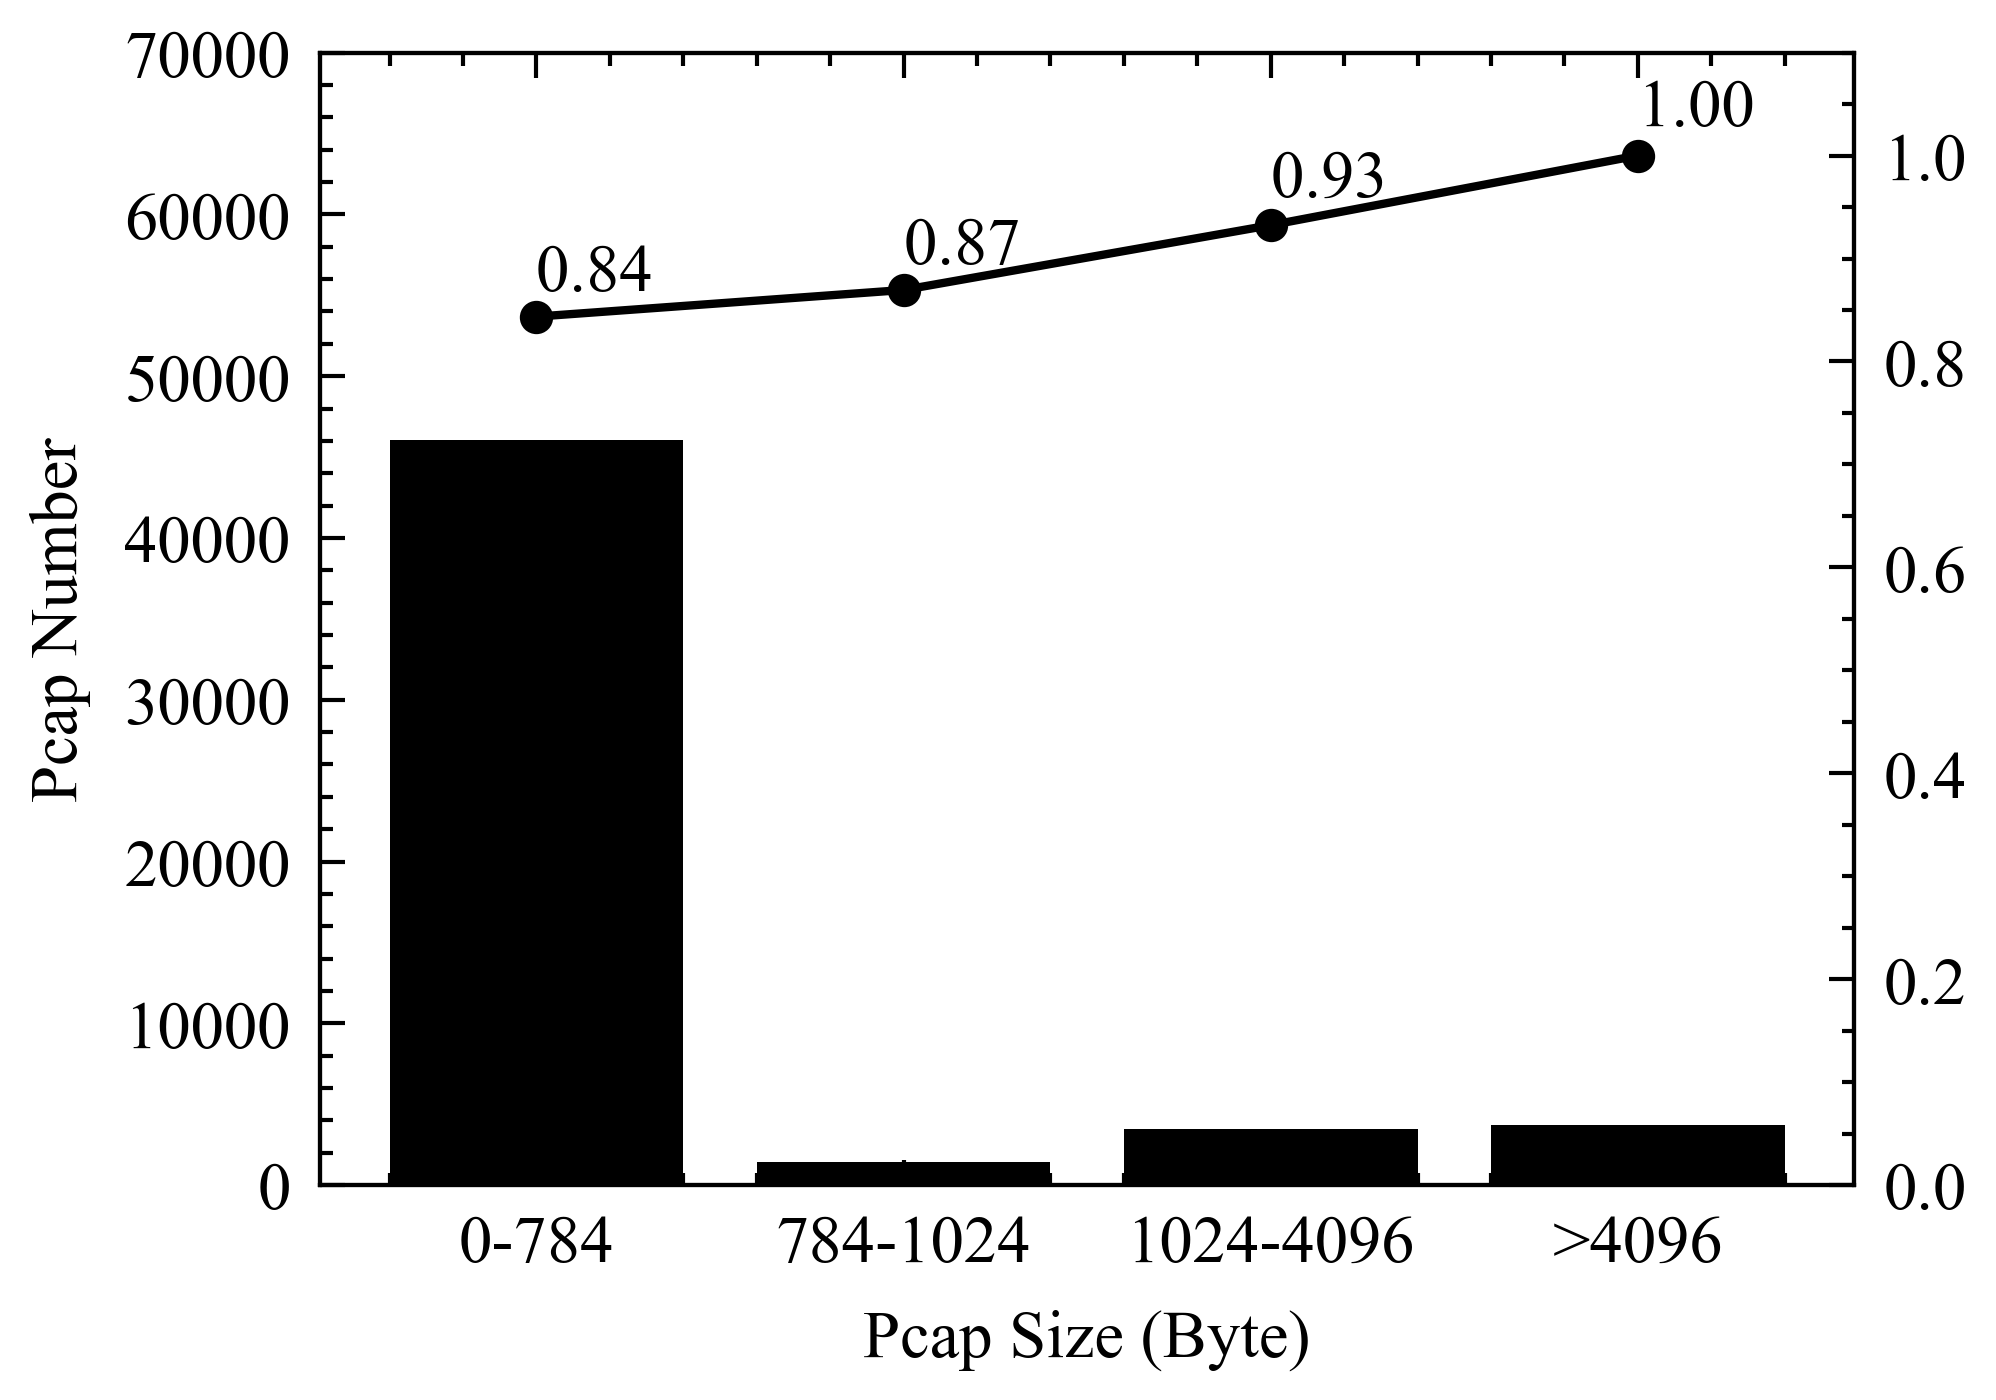

In [8]:
# 绘制直方图和折线图
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

fig_index = ['0-784', '784-1024', '1024-4096', '>4096']

# 绘制柱状图
ax.bar(fig_index, sample_num)
ax.set_ylim([0, 70000]) # 设置 y 轴范围
ax.set_xlabel('Pcap Size (Byte)') # 设置 x 轴的 label
ax.set_ylabel('Pcap Number') # 设置 y 轴的 label

# 绘制折线图
ax_twin = ax.twinx() # 次坐标
ax_twin.plot(fig_index, sample_num_percentage, marker='o', markersize=3)
ax_twin.set_ylim([0, 1.1])

# 添加文字
for tmp_index, tmp_percentage in zip(fig_index, sample_num_percentage):
    ax_twin.text(tmp_index, 1.03* tmp_percentage, "{:<6.2f}".format(tmp_percentage))